In [2]:
# turn into df

import glob
import pandas as pd

path = 'C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC'
files  = glob.glob(path + '/*.json')

df_pon_behaviorC =[]
session3 =[]
session4 =[]
session3_cam1 =[]
session3_cam2 =[]
session3_cam3 =[]
session4_cam1 =[]
session4_cam2 =[]
session4_cam3 =[]

for file in files:
    data = pd.read_json(file)
    data['rT']=  data['touchTimefromInit'] - data['ratio']
    #data = data.loc[data['ratio'] <1]
    filedata = {'filename':file, 'df':data}
    df_pon_behaviorC.append(filedata)
    dfs3 = {'filename':file, 'df':data.loc[data['vel_y'] == 2]}
    dfs4 ={'filename':file, 'df':data.loc[data['vel_y'] == -4]}
    session3.append(dfs3)
    session4.append(dfs4)
    dfs3cam1 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 1]}
    dfs3cam2 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 2]}
    dfs3cam3 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 3]}
    session3_cam1.append(dfs3cam1)
    session3_cam2.append(dfs3cam2)
    session3_cam3.append(dfs3cam3)
    dfs4cam1 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 1]}
    dfs4cam2 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 2]}
    dfs4cam3 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 3]}
    session4_cam1.append(dfs4cam1)
    session4_cam2.append(dfs4cam2)
    session4_cam3.append(dfs4cam3)

for i in range(0,len(df_pon_behaviorC)):
    print(df_pon_behaviorC[i]['filename'])
    print(df_pon_behaviorC[i]['df'].shape)
    # print('session3_cam1 shape: ',session3_cam1[i]['df'].shape)
    # print('session3_cam2 shape: ',session3_cam2[i]['df'].shape)
    # print('session3_cam3 shape: ',session3_cam3[i]['df'].shape)
    # print('session4_cam1 shape: ',session4_cam1[i]['df'].shape)
    # print('session4_cam2 shape: ',session4_cam2[i]['df'].shape)
    # print('session4_cam3 shape: ',session4_cam3[i]['df'].shape)



C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\HY-08-25-16-50-58-2024.json
(903, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Jia-08-26-10-00-55-2024.json
(833, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Lin-08-25-13-26-42-2024.json
(915, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Xiaochun-08-26-17-22-46-2024.json
(933, 18)
C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC\Ziyi-08-26-18-29-35-2024.json
(902, 18)


In [3]:

def rtlist_(individual):
    rt = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','initTime','pauseTime','touchTimefromInit','choice','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    rtlist_g = rt.loc[rt['vel_y'] == 2].drop(columns=['vel_y'])
    rtlist_0 = rt.loc[rt['vel_y'] == -4].drop(columns=['vel_y'])
    return rtlist_g, rtlist_0

rtlist_(1)[0]

,trial,isCorrect,ratio,camID,camNeck,targetsDistance,rT
0,1,False,0.15,1,2.0,1.15,0.888078
1,2,False,0.30,2,3.5,1.30,0.607650
2,3,True,0.15,3,2.0,1.20,0.495798
3,4,True,0.60,3,2.0,1.30,0.230112
4,5,True,0.35,1,0.0,1.70,0.528757
...,...,...,...,...,...,...,...
449,450,False,0.10,2,2.0,1.20,0.731848
450,451,True,0.25,3,2.0,1.20,0.462036
451,452,False,0.50,3,3.5,1.30,0.085449
452,453,False,0.20,3,2.0,1.15,0.600842


In [4]:
import scipy.stats as stats

def rtstats_(which):

    df = pd.DataFrame(columns=['f_oneway','p'])

    for i in range(0,len(df_pon_behaviorC)):
        rtlist_g = rtlist_(i)[0].copy()
        idcs = []
        rtlists = []
        d =  rtlist_g.groupby(which)['rT'].indices
        k = list(d.keys())
      
        for key in k:
            idx = rtlist_g.groupby(which)['rT'].indices[key]
            idcs.append(idx)
            rtlists.append(rtlist_g.loc[idx,'rT'])
    
        s1,p1 = stats.f_oneway(*rtlists)
        df.loc[i] =[s1,p1]
    return df

rtstats_('camID')


,f_oneway,p
0,0.596987,0.550905
1,1.514987,0.220927
2,3.579041,0.028686
3,0.849645,0.428209
4,1.356262,0.258678


In [5]:
rtstats_('camNeck')


,f_oneway,p
0,0.722959,0.485880
1,0.193502,0.824136
2,0.233503,0.791850
3,0.075873,0.926945
4,0.750662,0.472647


In [6]:
rtstats_('targetsDistance')

,f_oneway,p
0,2.428858,0.047093
1,1.094794,0.358531
2,1.807589,0.126215
3,0.144012,0.965595
4,0.442158,0.778133


In [7]:
rtstats_(['camID','camNeck'])

,f_oneway,p
0,0.750451,0.646834
1,0.450221,0.890375
2,1.460414,0.169416
3,0.625385,0.756691
4,0.749885,0.647338


In [8]:
rtstats_('isCorrect')

,f_oneway,p
0,21.480848,4.690788e-06
1,16.758750,5.028319e-05
2,4.461772,3.520106e-02
3,6.487221,1.117561e-02
4,30.143041,6.726084e-08


In [9]:
rtstats_('ratio')

,f_oneway,p
0,39.067722,6.039350e-51
1,37.262069,4.390362e-49
2,18.741129,1.288888e-26
3,4.753300,4.495339e-06
4,36.993444,1.040564e-48


In [10]:

for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].mean().to_frame()
    rtstd_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].std().to_frame()    
    rtmean_g_isC[f'rtmean{i}'] = rtmean_g_isC['rT']
    rtmean_g_isC = rtmean_g_isC.drop(columns=['rT']).copy()
    rtstd_g_isC[f'rtstd{i}'] = rtstd_g_isC['rT']
    rtstd_g_isC = rtstd_g_isC.drop(columns=['rT']).copy()
    k0 = pd.merge(rtmean_g_isC,rtstd_g_isC,how='left',on='isCorrect',suffixes=('_mean','_std'))
    if i == 0:
        k = k0
    else:
        k = pd.merge(k,k0,how='left',on='isCorrect')
k

,rtmean0,rtstd0,rtmean1,rtstd1,rtmean2,rtstd2,rtmean3,rtstd3,rtmean4,rtstd4
isCorrect,,,,,,,,,,
False,0.685224,0.283406,0.804676,0.489249,0.906070,0.527270,0.703556,0.547536,0.634122,0.296953
True,0.521511,0.362488,0.598116,0.471882,0.805928,0.465532,0.807143,0.346405,0.471346,0.304901


In [11]:
def rt_g(which,individual):
    rtlist_g = rtlist_(individual)[0].copy()
    rtmean_g_ = rtlist_g.groupby([which])['rT'].mean().to_frame()
    rtstd_g_ = rtlist_g.groupby([which])['rT'].std().to_frame()
    return pd.merge(rtmean_g_,rtstd_g_,how='left',on=which,suffixes=(f'_mean{i}',f'_std{i}'))

rt_g('ratio',1)
rt_g('camNeck',1)
rt_g('camID',1)
#rt_g('choice',1)
#rt_g('targetsDistance',1)
#

,rT_mean4,rT_std4
camID,,
1,0.664673,0.493581
2,0.696064,0.484574
3,0.601109,0.474572


In [12]:

for i in range(0,len(df_pon_behaviorC)):
    rt_g_i = rt_g('ratio',i)
    if i == 0:
        rt_g_group = rt_g_i
    else:
        rt_g_group = pd.merge(rt_g_group,rt_g_i,how='left',on='ratio')
rt_g_group.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

,rT_std0,rT_std1,rT_std2,rT_std3,rT_std4
ratio,,,,,
0.10,0.235917,0.431720,0.505256,0.598438,0.249597
0.15,0.183513,0.402261,0.448716,0.515469,0.277703
0.20,0.241237,0.373086,0.462972,0.423457,0.152809
0.25,0.279884,0.394545,0.486071,0.475966,0.273056
0.30,0.309380,0.306094,0.401780,0.449164,0.254846
0.35,0.259473,0.313715,0.436396,0.339859,0.246421
0.40,0.257541,0.437766,0.401721,0.259881,0.188049
0.50,0.300854,0.398340,0.384890,0.393284,0.293639
0.60,0.309375,0.380408,0.413320,0.247945,0.206612


In [13]:
rt_g_group.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

,rT_mean0,rT_mean1,rT_mean2,rT_mean3,rT_mean4
ratio,,,,,
0.10,0.794007,1.025932,1.041351,0.711596,0.750030
0.15,0.756542,1.006746,1.102208,0.871321,0.748624
0.20,0.718361,0.760116,0.978931,0.885317,0.618955
0.25,0.701532,0.900998,0.903070,0.838912,0.613776
0.30,0.669404,0.702832,0.871356,0.836266,0.660159
0.35,0.647698,0.588841,0.953916,0.845029,0.529925
0.40,0.514876,0.737377,0.936170,0.805091,0.509509
0.50,0.518351,0.509650,0.770259,0.747768,0.471601
0.60,0.405999,0.393533,0.688965,0.661497,0.384032


In [14]:
for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].mean().to_frame().reset_index(drop=False)
    rtstd_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].std().to_frame().reset_index(drop=False)
    rt_g_i = pd.merge(rtmean_g_i,rtstd_g_i,how='left',on=['camID','camNeck'],suffixes=(f'_mean{i}',f'_std{i}'))
    if i == 0:
        rt_g_cam = rt_g_i
    else:
        rt_g_cam = pd.merge(rt_g_cam,rt_g_i,how='left',on=['camID','camNeck'])
rt_g_cam.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

,camID,camNeck,rT_std0,rT_std1,rT_std2,rT_std3,rT_std4
0,1,0.0,0.313838,0.474082,0.575540,0.513909,0.290086
1,1,2.0,0.290967,0.540163,0.449394,0.409373,0.365614
2,1,3.5,0.394092,0.470679,0.556760,0.472821,0.304141
3,2,0.0,0.346819,0.513689,0.440742,0.473461,0.286412
4,2,2.0,0.342715,0.481136,0.513254,0.412068,0.302183
5,2,3.5,0.361803,0.466635,0.442286,0.356523,0.320819
6,3,0.0,0.340871,0.495319,0.510471,0.478511,0.302909
7,3,2.0,0.318791,0.456372,0.438654,0.370011,0.337559
8,3,3.5,0.420597,0.479930,0.437077,0.440537,0.293530


In [15]:
rt_g_cam.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

,camID,camNeck,rT_mean0,rT_mean1,rT_mean2,rT_mean3,rT_mean4
0,1,0.0,0.539641,0.691246,0.940676,0.745608,0.534117
1,1,2.0,0.555968,0.633498,0.930179,0.691205,0.527075
2,1,3.5,0.664482,0.669899,0.908587,0.754541,0.515240
3,2,0.0,0.597828,0.716143,0.741249,0.804169,0.484895
4,2,2.0,0.576649,0.697879,0.829905,0.768822,0.462543
5,2,3.5,0.556889,0.674171,0.804737,0.799456,0.560218
6,3,0.0,0.511861,0.614511,0.902857,0.775486,0.558467
7,3,2.0,0.553591,0.593735,0.722388,0.851203,0.540074
8,3,3.5,0.568202,0.595056,0.796188,0.716504,0.585138


In [16]:
def crlist_(individual):
    crlist = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','rT','initTime','pauseTime','touchTimefromInit','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    crlist_g = crlist.loc[crlist['vel_y'] == 2].drop(columns=['vel_y'])
    crlist_0 = crlist.loc[crlist['vel_y'] == -4].drop(columns=['vel_y'])
    return crlist_g, crlist_0
crlist_(0)[0]

,trial,choice,isCorrect,ratio,camID,camNeck,targetsDistance
0,1,a,False,0.10,1,0.0,1.10
1,2,l,True,0.35,3,0.0,1.30
2,3,a,True,0.20,1,3.5,1.30
3,4,a,True,0.50,1,2.0,1.15
4,5,a,False,0.35,1,2.0,1.10
...,...,...,...,...,...,...,...
446,447,a,True,0.60,2,3.5,1.15
447,448,l,True,0.40,2,3.5,1.15
448,449,l,True,0.20,2,0.0,1.30
449,450,a,True,0.40,1,2.0,1.20


所有人放在一个表里

In [17]:

def cr(which,individual):
    crlist_g = crlist_(individual)[0]
    crlist_which_g=crlist_g.copy().groupby(which)
    r_which_g = crlist_which_g['isCorrect'].mean().reset_index(drop=False)
    #print(crlist_which_g['isCorrect'].count())
    r_which_g[f'cr{individual}'] = r_which_g['isCorrect']
    r_which_g = r_which_g.drop(columns=['isCorrect'])
    return r_which_g

def cr_which_group(which):
    cr_which_i = []
    for i in range(0,len(df_pon_behaviorC)):
        cr_which_i.append(cr(which=which,individual=i))

    a = cr_which_i[0]
    for i in range(0,len(cr_which_i)-1):
        a = pd.merge(a,cr_which_i[i+1],how='left',on=which)
    return a

#cr_which_group('targetsDistance')
cr_which_group('ratio')
#cr_which_group('camNeck')
#cr_which_group('choice')
#cr_which_group('camID')

,ratio,cr0,cr1,cr2,cr3,cr4
0,0.10,0.600000,0.574468,0.583333,0.275862,0.568182
1,0.15,0.422222,0.600000,0.478261,0.433962,0.422222
2,0.20,0.456522,0.586957,0.468085,0.541667,0.466667
3,0.25,0.755556,0.688889,0.541667,0.530612,0.521739
4,0.30,0.688889,0.577778,0.543478,0.551020,0.577778
5,0.35,0.666667,0.844444,0.644444,0.673913,0.652174
6,0.40,0.800000,0.866667,0.711111,0.755556,0.711111
7,0.50,0.844444,0.800000,0.755556,0.733333,0.733333
8,0.60,0.911111,0.891304,0.804348,0.822222,0.777778
9,1.00,0.933333,0.888889,0.888889,0.888889,0.977778


In [18]:
cr_n_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camNeck','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_n_r_g_i.append(x)

e = cr_n_r_g_i[0]
for i in range(0,len(cr_n_r_g_i)-1):
    e = pd.merge(e,cr_n_r_g_i[i+1],how='left',on=['camNeck','ratio'])

e

cr0       cr1       cr2       cr3       cr4
camNeck ratio                                                  
0.0     0.10   0.466667  0.733333  0.250000  0.411765  0.666667
        0.15   0.400000  0.666667  0.600000  0.428571  0.600000
        0.20   0.533333  0.500000  0.235294  0.600000  0.400000
        0.25   0.533333  0.533333  0.529412  0.368421  0.312500
        0.30   0.666667  0.466667  0.466667  0.375000  0.666667
        0.35   0.733333  0.866667  0.666667  0.625000  0.666667
        0.40   0.666667  0.866667  0.800000  0.866667  0.666667
        0.50   0.866667  0.733333  0.866667  0.600000  0.666667
        0.60   1.000000  0.866667  0.866667  0.866667  0.733333
        1.00   1.000000  0.733333  0.933333  0.800000  1.000000
2.0     0.10   0.600000  0.600000  0.705882  0.157895  0.428571
        0.15   0.600000  0.666667  0.312500  0.411765  0.333333
        0.20   0.375000  0.600000  0.666667  0.529412  0.466667
        0.25   1.000000  0.866667  0.687500  0.800000  0.666667
        0.30   0.866667  0.666667  0.733333  0.733333  0.533333
        0.35   0.666667  0.866667  0.666667  0.600000  0.562500
        0.40   0.933333  0.933333  0.666667  0.666667  0.733333
        0.50   0.866667  0.933333  0.666667  0.928571  0.866667
        0.60   0.933333  0.937500  0.866667  0.933333  0.866667
        1.00   0.933333  1.000000  0.933333  1.000000  1.000000
3.5     0.10   0.733333  0.411765  0.800000  0.272727  0.600000
        0.15   0.266667  0.466667  0.533333  0.466667  0.333333
        0.20   0.466667  0.666667  0.533333  0.500000  0.533333
        0.25   0.733333  0.666667  0.400000  0.466667  0.600000
        0.30   0.533333  0.600000  0.437500  0.555556  0.533333
        0.35   0.600000  0.800000  0.600000  0.800000  0.733333
        0.40   0.800000  0.800000  0.666667  0.733333  0.733333
        0.50   0.800000  0.733333  0.733333  0.687500  0.666667
        0.60   0.800000  0.866667  0.687500  0.666667  0.733333
        1.00   0.866667  0.933333  0.800000  0.866667  0.933333

In [19]:
cr_td_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['targetsDistance','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_td_r_g_i.append(x)

b = cr_td_r_g_i[0]
for i in range(0,len(cr_td_r_g_i)-1):
    b = pd.merge(b,cr_td_r_g_i[i+1],how='left',on=['targetsDistance','ratio'])

b

cr0       cr1       cr2       cr3       cr4
targetsDistance ratio                                                  
1.10            0.10   0.666667  0.555556  0.500000  0.272727  0.625000
                0.15   0.333333  0.555556  0.222222  0.384615  0.333333
                0.20   0.333333  0.777778  0.555556  0.272727  0.444444
                0.25   0.777778  0.555556  0.600000  0.500000  0.800000
                0.30   0.555556  0.333333  0.333333  0.500000  0.444444
                0.35   0.555556  0.777778  0.666667  0.600000  0.888889
                0.40   0.888889  1.000000  0.666667  0.777778  0.666667
                0.50   0.888889  0.666667  0.777778  0.666667  0.666667
                0.60   0.888889  0.700000  1.000000  0.888889  0.777778
                1.00   1.000000  0.888889  0.777778  0.777778  1.000000
1.15            0.10   0.555556  0.500000  0.600000  0.153846  0.777778
                0.15   0.444444  0.888889  0.444444  0.555556  0.555556
                0.20   0.333333  0.200000  0.444444  0.700000  0.333333
                0.25   0.555556  0.777778  0.666667  0.400000  0.333333
                0.30   0.555556  0.555556  0.444444  0.444444  0.666667
                0.35   0.666667  0.888889  0.555556  0.555556  0.700000
                0.40   0.666667  0.777778  0.444444  0.777778  0.666667
                0.50   0.888889  0.888889  0.666667  0.777778  0.666667
                0.60   1.000000  0.888889  0.600000  0.555556  0.666667
                1.00   1.000000  0.888889  0.777778  0.777778  0.888889
1.20            0.10   0.666667  0.555556  0.600000  0.454545  0.555556
                0.15   0.333333  0.555556  0.555556  0.333333  0.222222
                0.20   0.666667  0.666667  0.222222  0.666667  0.777778
                0.25   0.777778  0.777778  0.555556  0.454545  0.555556
                0.30   0.888889  0.555556  0.555556  0.545455  0.777778
                0.35   0.666667  0.888889  0.666667  0.444444  0.444444
                0.40   0.777778  0.777778  0.777778  0.888889  0.555556
                0.50   0.777778  0.888889  0.666667  0.600000  0.666667
                0.60   0.888889  1.000000  0.888889  0.777778  0.555556
                1.00   0.777778  0.888889  1.000000  0.888889  1.000000
1.30            0.10   0.555556  0.888889  0.666667  0.272727  0.333333
                0.15   0.555556  0.444444  0.444444  0.545455  0.666667
                0.20   0.444444  0.666667  0.545455  0.333333  0.222222
                0.25   0.666667  0.555556  0.363636  0.666667  0.333333
                0.30   0.666667  0.444444  0.444444  0.700000  0.555556
                0.35   0.555556  0.666667  0.666667  1.000000  0.444444
                0.40   0.666667  0.888889  0.777778  0.666667  0.888889
                0.50   0.666667  0.777778  0.777778  0.666667  0.666667
                0.60   0.888889  0.888889  0.666667  0.888889  1.000000
                1.00   1.000000  0.777778  0.888889  1.000000  1.000000
1.70            0.10   0.555556  0.400000  0.555556  0.250000  0.555556
                0.15   0.444444  0.555556  0.700000  0.363636  0.333333
                0.20   0.500000  0.666667  0.555556  0.777778  0.555556
                0.25   1.000000  0.777778  0.555556  0.666667  0.555556
                0.30   0.777778  1.000000  0.900000  0.555556  0.444444
                0.35   0.888889  1.000000  0.666667  0.777778  0.777778
                0.40   1.000000  0.888889  0.888889  0.666667  0.777778
                0.50   1.000000  0.777778  0.888889  1.000000  1.000000
                0.60   0.888889  1.000000  0.888889  1.000000  0.888889
                1.00   0.888889  1.000000  1.000000  1.000000  1.000000

In [51]:
df = pd.DataFrame(columns=['f','p'])
for i in range(0,len(df_pon_behaviorC)):
    x = b.loc[:,[f'cr{i}']]
    xx = x.loc[1.10]
    tdlist = crlist_(0)[0]['targetsDistance'].unique()
    for index,item in enumerate(tdlist):
        if index < len(tdlist)-1:
            a = x.loc[tdlist[index+1]]
            xx = pd.merge(xx,a,how='left',on=['ratio'],suffixes=('',f'_{index+1}'))
        else:break
    xx = xx.reset_index('ratio').to_numpy().T

    f,p = stats.f_oneway(xx[0],xx[1],xx[2],xx[3],xx[4])
    df.loc[i] = [f,p]
   
df
    #tarD 有差异

,f,p
0,4.009388,0.007260
1,5.151585,0.001670
2,2.677911,0.043642
3,2.225768,0.081204
4,2.267723,0.076654


In [54]:

cr_id_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_id_r_g_i.append(x)

a = cr_id_r_g_i[0]
for i in range(0,len(cr_id_r_g_i)-1):
    a = pd.merge(a,cr_id_r_g_i[i+1],how='left',on=['camID','ratio'])

a

cr0       cr1       cr2       cr3       cr4
camID ratio                                                  
1     0.10   0.533333  0.466667  0.562500  0.315789  0.400000
      0.15   0.400000  0.466667  0.466667  0.555556  0.400000
      0.20   0.312500  0.666667  0.352941  0.437500  0.466667
      0.25   0.733333  0.800000  0.437500  0.411765  0.533333
      0.30   0.666667  0.466667  0.437500  0.333333  0.600000
      0.35   0.533333  0.666667  0.600000  0.562500  0.666667
      0.40   0.733333  0.733333  0.666667  0.866667  0.600000
      0.50   0.866667  0.666667  0.933333  0.733333  0.466667
      0.60   1.000000  0.812500  0.687500  0.733333  0.466667
      1.00   0.866667  0.666667  0.733333  0.733333  0.933333
2     0.10   0.600000  0.533333  0.666667  0.235294  0.785714
      0.15   0.266667  0.533333  0.466667  0.411765  0.466667
      0.20   0.533333  0.400000  0.533333  0.647059  0.466667
      0.25   0.933333  0.533333  0.411765  0.625000  0.533333
      0.30   0.533333  0.666667  0.666667  0.500000  0.266667
      0.35   0.800000  0.866667  0.666667  0.800000  0.625000
      0.40   0.733333  0.866667  0.666667  0.800000  0.866667
      0.50   0.733333  0.800000  0.666667  0.600000  0.866667
      0.60   0.733333  1.000000  0.866667  0.800000  0.866667
      1.00   1.000000  1.000000  0.933333  0.933333  1.000000
3     0.10   0.666667  0.705882  0.529412  0.272727  0.533333
      0.15   0.600000  0.800000  0.500000  0.333333  0.400000
      0.20   0.533333  0.687500  0.533333  0.533333  0.466667
      0.25   0.600000  0.733333  0.800000  0.562500  0.500000
      0.30   0.866667  0.600000  0.533333  0.866667  0.866667
      0.35   0.666667  1.000000  0.666667  0.666667  0.666667
      0.40   0.933333  1.000000  0.800000  0.600000  0.666667
      0.50   0.933333  0.933333  0.666667  0.866667  0.866667
      0.60   1.000000  0.866667  0.866667  0.933333  1.000000
      1.00   0.933333  1.000000  1.000000  1.000000  1.000000

In [55]:

for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f2,p2 = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f2,p2)
    
#camID 没差异

0.7974626969901533 0.46079711472480495
3.2435070871870213 0.054648603144163824
0.9397573759352251 0.4031320043743341
0.49925773692430836 0.6124748346752478
1.3548975083006638 0.2749574354119846


In [23]:
sampels = []
for i in range(1,4):
    x = a.loc[i].reset_index(drop=False).drop(columns=['ratio']).to_numpy()
    sampels.append(x)

f,p = stats.f_oneway(sampels[0],sampels[1],sampels[2])
print(f,p)
# 个体之间没有显著差异


[0.7974627  3.24350709 0.93975738 0.49925774 1.35489751] [0.46079711 0.0546486  0.403132   0.61247483 0.27495744]


In [24]:

cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x0 = crlist_(i)[0].copy()
    x0  = x0.loc[x0['ratio']<=0.4]
    x=x0.groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
    #print(x0.groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c_sure = c
c_sure

,camID,camNeck,cr0,cr1,cr2,cr3,cr4
0,1,0.0,0.457143,0.628571,0.435897,0.500000,0.485714
1,1,2.0,0.694444,0.628571,0.571429,0.475000,0.542857
2,1,3.5,0.514286,0.571429,0.500000,0.487179,0.542857
3,2,0.0,0.628571,0.600000,0.527778,0.526316,0.628571
4,2,2.0,0.628571,0.714286,0.722222,0.578947,0.514286
5,2,3.5,0.628571,0.571429,0.485714,0.594595,0.571429
6,3,0.0,0.628571,0.750000,0.542857,0.512195,0.583333
7,3,2.0,0.828571,0.885714,0.605263,0.571429,0.542857
8,3,3.5,0.628571,0.729730,0.714286,0.500000,0.628571


In [25]:
cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
   # print(crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c

,camID,camNeck,cr0,cr1,cr2,cr3,cr4
0,1,0.0,0.620000,0.580000,0.518519,0.527273,0.500000
1,1,2.0,0.784314,0.725490,0.680000,0.574074,0.640000
2,1,3.5,0.580000,0.620000,0.557692,0.563636,0.520000
3,2,0.0,0.720000,0.700000,0.647059,0.603774,0.720000
4,2,2.0,0.680000,0.780000,0.725490,0.698113,0.620000
5,2,3.5,0.660000,0.680000,0.580000,0.576923,0.680000
6,3,0.0,0.720000,0.803922,0.680000,0.607143,0.686275
7,3,2.0,0.860000,0.920000,0.660377,0.700000,0.680000
8,3,3.5,0.740000,0.769231,0.720000,0.618182,0.720000


In [46]:
cr_cam = c.drop(columns=['camNeck','camID']).to_numpy()
f,p = stats.f_oneway(*cr_cam)
print(f,p)

cr_cams = c_sure.drop(columns=['camNeck','camID']).to_numpy()
fs,ps = stats.f_oneway(*cr_cams)
print(fs,ps)

# 机位显示差异

5.275323076514294 0.00020658530753142143
2.1610017918479687 0.05478916485986642



5.275323076514294   
0.00020658530753142143   
all   
4.287895050941156   
0.0010719286620237735    
>0.4  
2.1610017918479687   
0.05478916485986642     
<=0.4

In [27]:
for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f,p = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f,p)
#camID 没差异

0.7974626969901533 0.46079711472480495
3.2435070871870213 0.054648603144163824
0.9397573759352251 0.4031320043743341
0.49925773692430836 0.6124748346752478
1.3548975083006638 0.2749574354119846


In [28]:
# read 2afc time

import matplotlib.pyplot as plt

def read2afcTime(session3_cam1,name):
    tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
    color = ['yellow','b','green','pink','orange','purple']
    list= []
    fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
    fig.suptitle(f'{name}, 2afc time')
    for i,item in enumerate(tarDislist):
        d = {'tarD':item,'l':[]}
        list.append(d)
        ax[i].set_title(f'{name}, tarDistance: {item.round(2)}')
        # compare across inidividual
        for j in range(0,len(df_pon_behaviorC)):
            toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
            ttimtIni_s3_id1 = toplt['rT'].mean().reset_index(drop=False)
            data = {'inidividual':j,'rT':ttimtIni_s3_id1['rT'].tolist(),'ratio':ttimtIni_s3_id1['ratio'].round(2).tolist()}
            list[i]['l'].append(data)
            ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['rT'],color=color[j])
            ax[i].set_ylim(0,2)

    fig, ax = plt.subplots(figsize=(7, 4))

    for t,item in enumerate(tarDislist):
        listrT=[]
        for i , item in enumerate(sorted(df_pon_behaviorC[0]['df']['ratio'].unique())):
            data = {'ratio':item,'rT':[]}
            listrT.append(data)
            #print(item.round(2))
        # print(list[t]['tarD'])
            for j in range(0,len(df_pon_behaviorC)):
                listrT[i]['rT'].append(list[t]['l'][j]['rT'][i])

        x = sorted(df_pon_behaviorC[0]['df']['ratio'].unique())
        y = [np.mean(listrT[0]['rT']),np.mean(listrT[1]['rT']),np.mean(listrT[2]['rT']),np.mean(listrT[3]['rT']),np.mean(listrT[4]['rT'])
            ,np.mean(listrT[5]['rT']),np.mean(listrT[6]['rT']),np.mean(listrT[7]['rT']),np.mean(listrT[8]['rT']),np.mean(listrT[9]['rT'])]
        xerr = 0
        yerr = [np.std(listrT[0]['rT']),np.std(listrT[1]['rT']),np.std(listrT[2]['rT']),np.std(listrT[3]['rT']),np.std(listrT[4]['rT'])
            ,np.std(listrT[5]['rT']),np.std(listrT[6]['rT']),np.std(listrT[7]['rT']),np.std(listrT[8]['rT']),np.std(listrT[9]['rT'])]

        ls = 'dotted'
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label=f'tar{tarDislist[t].round(2)}')
        ax.set_ylim(0,2)
        plt.xticks(x)
        plt.suptitle(f'RTtoRatio {name}')##
        plt.legend()
        plt.savefig(f'{name} RTtoRatio.png') 

NameError: name 'np' is not defined

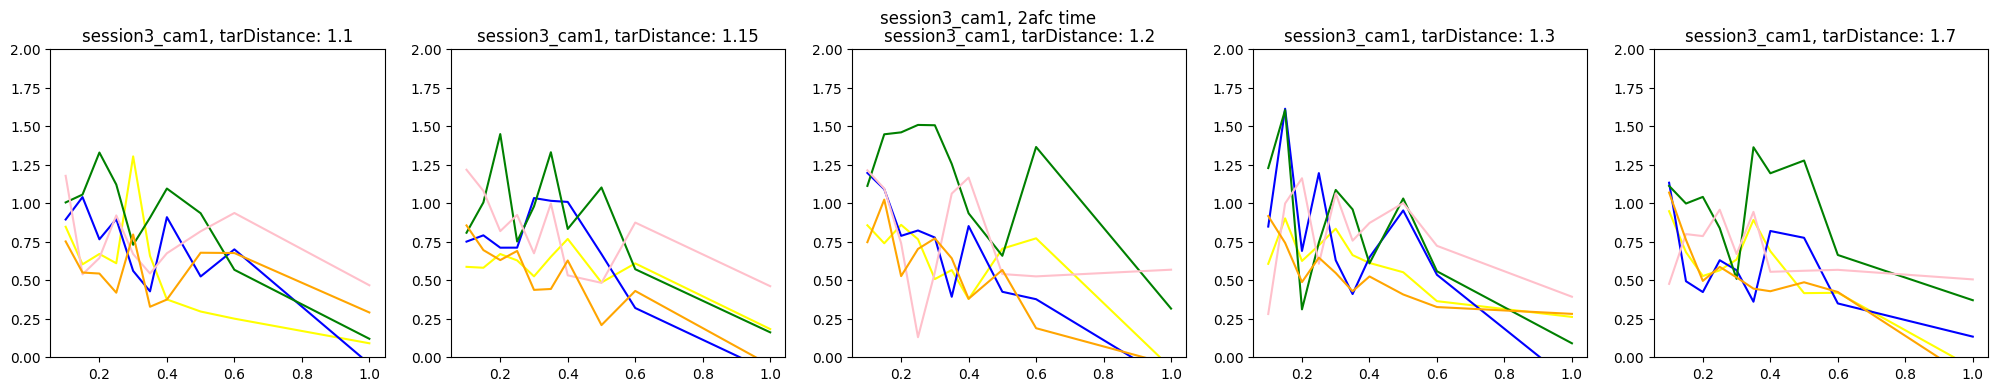

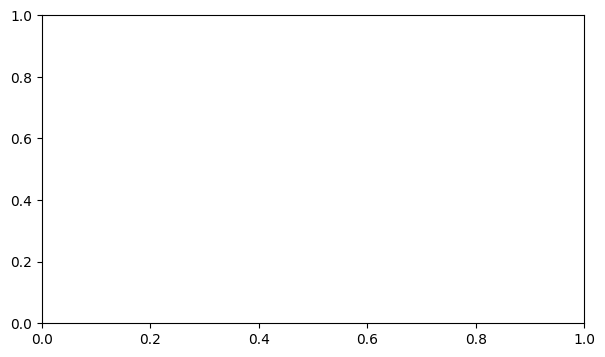

In [29]:
read2afcTime(session3_cam1,'session3_cam1')
read2afcTime(session3_cam2,'session3_cam2')
read2afcTime(session3_cam3,'session3_cam3')
read2afcTime(session4_cam1,'session4_cam1')
read2afcTime(session4_cam2,'session4_cam2')
read2afcTime(session4_cam3,'session4_cam3')

In [ ]:
#fig, ax = plt.subplots(2* len(df_pon_behaviorC),1, figsize=(25, 15))
def getCR(session3_cam1):
    session3_cam1_CR =[]
    for i,item in enumerate(session3_cam1):
        list = item['df'].groupby('isCorrect').size().reset_index(name='counts')
        cr = list['counts'][1]/(list['counts'][0]+list['counts'][1])
        session3_cam1_CR.append(cr.round(3))
    return(session3_cam1_CR) #session3_cam1_CR

list = [session3_cam1,
session3_cam2,
session3_cam3,
session4_cam1,
session4_cam2,
session4_cam3]

liststr = ['session3_cam1',
'session3_cam2',
'session3_cam3',
'session4_cam1',
'session4_cam2',
'session4_cam3']

import numpy as np

listCR = []
listCR_ = []
for i,item in enumerate(list):
    data = getCR(item)
    mean = numpy.mean(data)
    std = numpy.std(data)
    cr = {'group':liststr[i],'cr_individuals':data,'mean':mean,'std':std}
    listCR.append(cr)
    listCR_.append(data)
listCR

NameError: name 'numpy' is not defined

pdf = pd.DataFrame(listCR_)
pdf.to_excel('listCR_.xlsx',index=True)

In [ ]:
x = [1,2,3]
y = [np.mean(listCR_[0]), np.mean(listCR_[1]), np.mean(listCR_[2])]
y2 = [np.mean(listCR_[3]), np.mean(listCR_[4]), np.mean(listCR_[5])]
xerr = 0
yerr = [np.std(listCR_[0]), np.std(listCR_[1]), np.std(listCR_[2])]
yerr2 = [np.std(listCR_[3]), np.std(listCR_[4]), np.std(listCR_[5])]
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label='g=9.8')
ax.errorbar(x, y2, xerr=xerr, yerr=yerr2, linestyle=ls,label='g=0')
ax.set_ylim(0,1)
plt.xticks(x)
plt.suptitle('camId CR ')##
plt.legend()
#plt.savefig('pon_CR_camID_allRatio.png') 

In [ ]:
# read 2afc CR change\
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(df_pon_behaviorC),1, figsize=(25, 15))
fig.suptitle('2afc CR to time')
for i,item in enumerate(df_pon_behaviorC):
    ax[i].set_title(str(i))
    a=item['df']['correctRate'].astype(float)
    x=item['df']['initTime'].astype(float)
    ax[i].plot(x,a)
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(0,1800)
plt.savefig('2afc_CRtoTime.png')

In [ ]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    print(item.round(2))
    ax[0,i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[0,i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session4_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[0,i].set_title(f'session4_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session4_cam1[j]['df'].loc[session4_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s4_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s4_id1 = ttimtIni_s4_id1
        ttimtPaus_s4_id1['touchTimefromPause'] = ttimtIni_s4_id1['touchTimefromInit']- ttimtIni_s4_id1['ratio']
        ax[0,i].plot(ttimtIni_s4_id1['ratio'],ttimtIni_s4_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s4_id1['ratio'],ttimtPaus_s4_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)


In [ ]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id2['ratio'],ttimtIni_s3_id2['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id3['ratio'],ttimtIni_s3_id3['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)



In [ ]:
# read 2afc time from pause
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id2 = ttimtIni_s3_id2
        ttimtPaus_s3_id2['touchTimefromPause'] = ttimtIni_s3_id2['touchTimefromInit']- ttimtIni_s3_id2['ratio']
       
        ax[i].plot(ttimtPaus_s3_id2['ratio'],ttimtPaus_s3_id2['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id3 = ttimtIni_s3_id3
        ttimtPaus_s3_id3['touchTimefromPause'] = ttimtIni_s3_id3['touchTimefromInit']- ttimtIni_s3_id3['ratio'] 
       
        ax[i].plot(ttimtPaus_s3_id3['ratio'],ttimtPaus_s3_id3['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

In [ ]:
## compare mean and std and distribution
## plot  x <- tar ,indipendently ratio
## compare acreoss view perspectives
## or substract first then average

In [ ]:
## read eye
## define event
## event coralate with frame
## plot pupil
